In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
cols = np.load('../Data/Final/ClashOfClans_cols.npy', allow_pickle=True)
arr = np.load('../Data/Final/ClashOfClans.npy', allow_pickle=True)
df = pd.DataFrame(arr, columns=cols)
df = df[['post_id', 'time', 'post_text', 
            'images_description', 'shares', 'comments',
                'comments_full', 'reaction_count',
                'reactions', 'reactors']]
df[['shares', 'comments', 'reaction_count']] = df[['shares', 'comments', 'reaction_count']].astype(int)

In [3]:
df.head()

,post_id,time,post_text,images_description,shares,comments,comments_full,reaction_count,reactions,reactors
0,890116715803522,2023-11-07 20:15:02,Books of Clash Vol 2 is on sale! 🎉 Get it now ...,[May be an image of text],17,267,"[{'comment_id': '1483156222461521', 'comment_u...",1876,"{'like': 1470, 'love': 353, 'haha': 12, 'wow':...","[{'name': 'Di Mo', 'link': 'https://facebook.c..."
1,889593269189200,2023-11-06 19:15:55,"edit: the issues have been fixed, thanks for y...",[],23,764,"[{'comment_id': '358059689925658', 'comment_ur...",3570,"{'like': 2790, 'love': 524, 'haha': 185, 'wow'...","[{'name': 'Di Mo', 'link': 'https://facebook.c..."
2,889556962526164,2023-11-06 17:36:19,Hey Chief! We've got a brief maintenance happe...,[May be an image of text that says 'MAINTENANC...,20,395,"[{'comment_id': '1259825128044288', 'comment_u...",3162,"{'like': 2520, 'love': 538, 'haha': 29, 'wow':...","[{'name': 'Di Mo', 'link': 'https://facebook.c..."
3,888646695950524,2023-11-04 19:54:48,"Before Barcher, Hog Wizard, Witch Golem and La...","[May be an image of text, May be an image of t...",152,475,"[{'comment_id': '285704867769829', 'comment_ur...",7860,"{'like': 5406, 'love': 2209, 'haha': 30, 'wow'...","[{'name': 'Di Mo', 'link': 'https://facebook.c..."
4,888172002664660,2023-11-03 20:35:02,,[May be an image of 1 person],29,294,"[{'comment_id': '592877136242752', 'comment_ur...",6389,"{'like': 4458, 'love': 1772, 'haha': 11, 'wow'...","[{'name': 'Di Mo', 'link': 'https://facebook.c..."


# Thời gian thường đăng bài

## Trong ngày

In [4]:
df['hour'] = df['time'].dt.hour

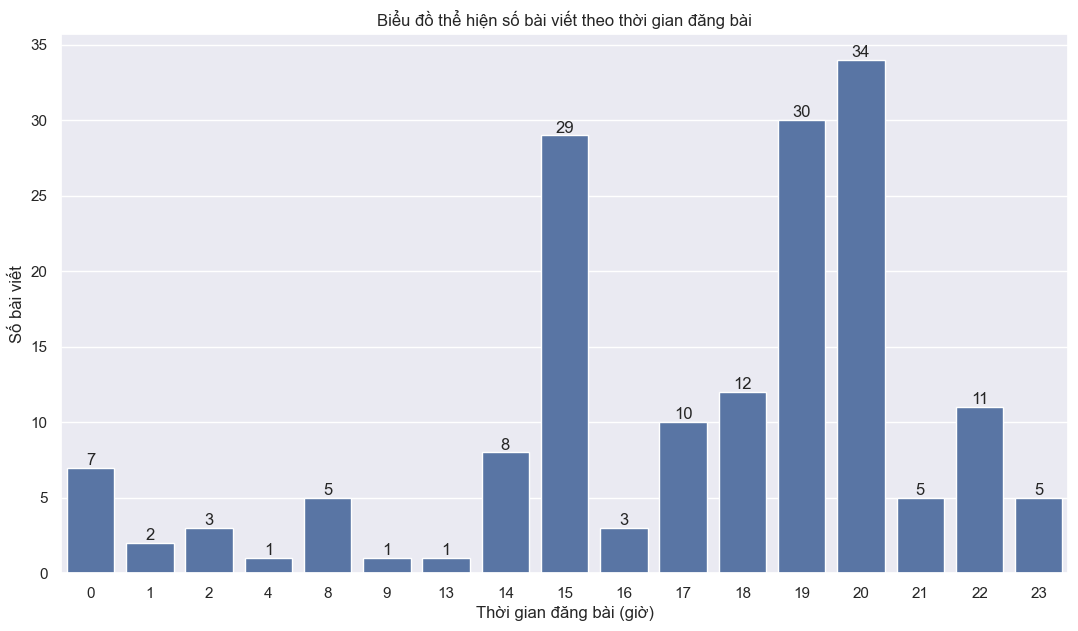

In [5]:
plt.figure(figsize=(13, 7))
ax = sns.barplot(df['hour'].value_counts())
plt.xlabel('Thời gian đăng bài (giờ)')
plt.ylabel('Số bài viết')
plt.title('Biểu đồ thể hiện số bài viết theo thời gian đăng bài')

for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='hour'>

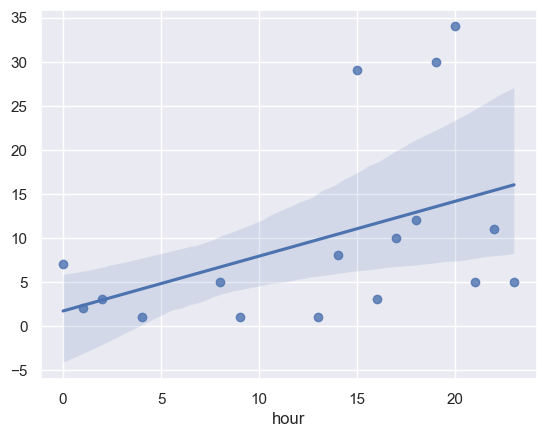

In [21]:
sns.regplot(x=df['hour'].value_counts().index, y=df['hour'].value_counts().values, fit_reg=True)

In [68]:
df['post_text'].loc[df['hour'] == 20]

0      Books of Clash Vol 2 is on sale! 🎉 Get it now ...
4                                                       
14     Clan Games are in full swing, with fantastic r...
18                                  HOOOOOG WEEEEzard!!!
19     The range of an Archer, the rage of a Barbaria...
22     📢DON’T MISS THE STAGE 5 FINALS! By the end of ...
23     📢STAGE 5 OF THE CHAMPIONSHIP QUALIFIERS! We’re...
29     Clash of Clans on PC WHEN?\n\n🚀 How about NOW!...
32     📢IT’S TIME FOR STAGE 4! 16 teams compete in a ...
34     World Championship Qualifiers: Stage 4 - Day 1...
38     📢STAGE 3 OF THE WORLD CHAMPIONSHIP QUALIFIERS ...
40     📢 STAGE 3 OF THE WORLD CHAMPIONSHIP QUALIFIERS...
43     🚀Haven't claimed your FREE 1.75M Gold & Elixir...
47            CHESS, CLASH, CHESS, CLASH, CHESS, CLASH 💥
48     📢STAGE 2 OF THE WORLD CHAMPIONSHIP QUALIFIERS ...
53     If you're looking for a more in-depth understa...
55     🔥Oh SNAP - new challenge!🔥\nIt's FREE 1.75M GO...
56     🔥Oh SNAP - new challenge

## Trong tuần

In [7]:
df['weekday'] = df['time'].dt.day_name()

In [8]:
def f(x):
    if x == 'Monday':
        return 'Thứ hai'
    elif x == 'Tuesday':
        return 'Thứ ba'
    elif x == 'Wednesday':
        return 'Thứ tư'
    elif x == 'Thursday':
        return 'Thứ năm'
    elif x == 'Friday':
        return 'Thứ sáu'
    elif x == 'Saturday':
        return 'Thứ bảy'
    return 'Chủ nhật'

df['weekday'] = df['weekday'].apply(lambda x: f(x))

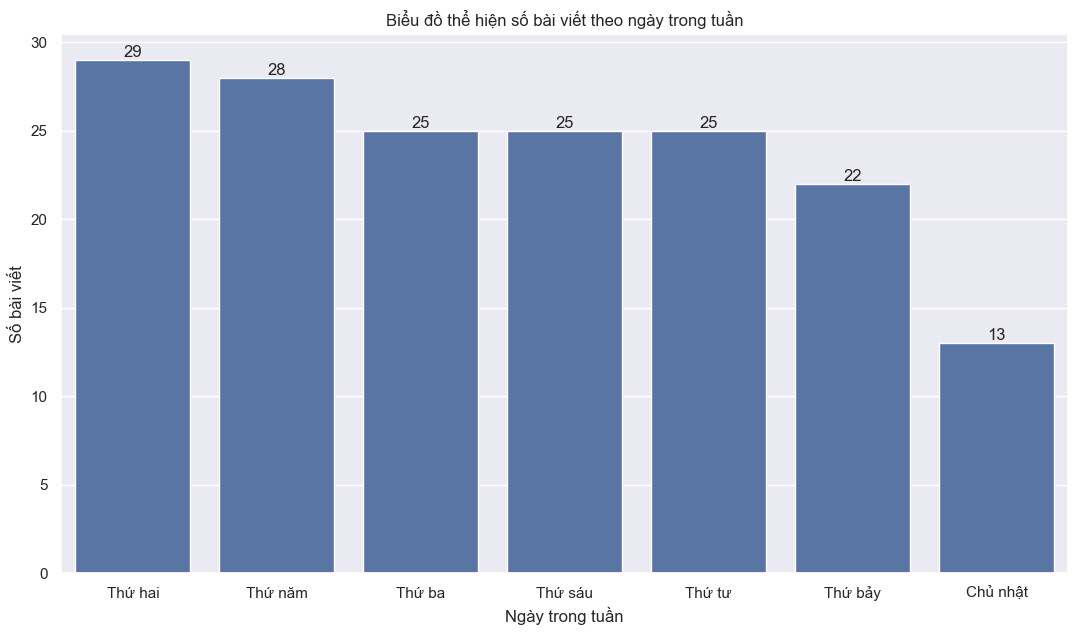

In [9]:
plt.figure(figsize=(13, 7))
ax = sns.barplot(df['weekday'].value_counts())
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số bài viết')
plt.title('Biểu đồ thể hiện số bài viết theo ngày trong tuần')

for i in ax.containers:
    ax.bar_label(i)

In [ ]:
def f(x):
    if x == 'Thứ hai':
        return 0
    if x == 'Thứ ba':
        return 1
    if x == 'Thứ tư':
        return 2
    if x == 'Thứ năm':
        return 3
    if x == 'Thứ sáu':
        return 4
    if x == 'Thứ bảy':
        return 5
    return 6

<Axes: >

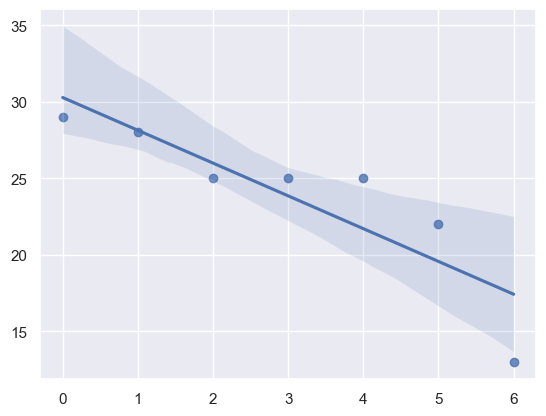

In [26]:
sns.regplot(x=[0, 1, 2, 3, 4, 5, 6], y=df['weekday'].value_counts().values, fit_reg=True)

=> chủ nhật ngày nghỉ :))

Không phân tích cmt, react, share với time tại không có ràng buộc

# Shares <> Comments

<Axes: >

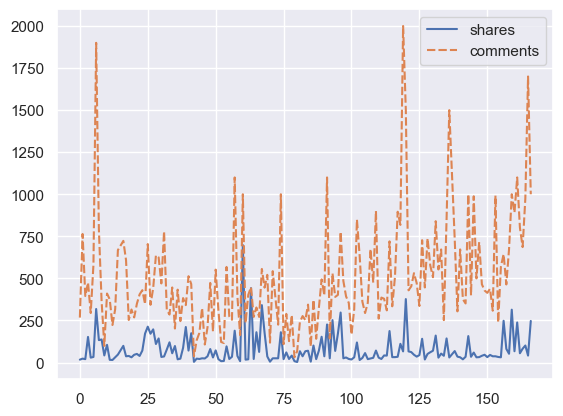

In [59]:
sns.lineplot(df[['shares', 'comments']].drop(index=[72, 15, 137]))

In [53]:
df[['shares', 'comments']].drop(index=[72, 15, 137]).corr()

,shares,comments
shares,1.000000,0.444165
comments,0.444165,1.000000


In [33]:
df['shares'].loc[df['shares'] > 1000]

15      2100
72     14000
137     2000
Name: shares, dtype: int32

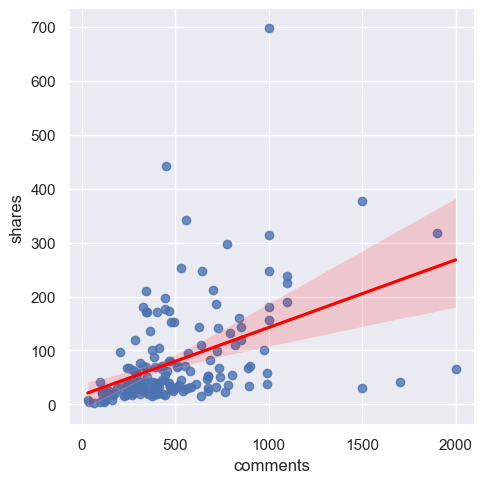

In [67]:
sns.lmplot(x='comments', y='shares', data=df[['shares', 'comments']].drop(index=[72, 15, 137]), order=1, line_kws={'color': 'red'}, fit_reg=True)

# Shares <> Reactions

In [62]:
df[['shares', 'reaction_count']].drop(index=[72, 15, 137]).corr()

,shares,reaction_count
shares,1.000000,0.592049
reaction_count,0.592049,1.000000


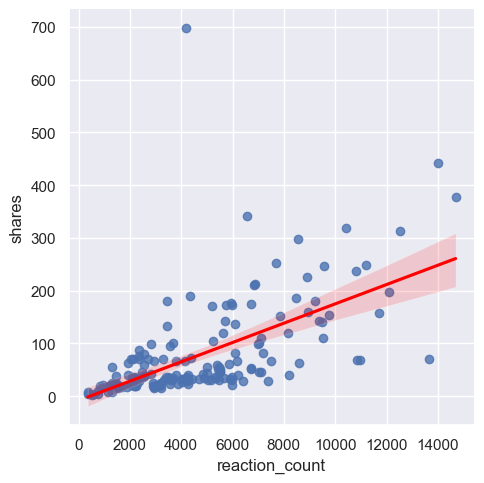

In [61]:
sns.lmplot(x='reaction_count', y='shares', data=df[['shares', 'reaction_count']].drop(index=[72, 15, 137]), order=1, line_kws={'color': 'red'})

# Comments <> Reactions

In [64]:
df[['comments', 'reaction_count']].drop(index=[72]).corr()

,comments,reaction_count
comments,1.00000,0.76105
reaction_count,0.76105,1.00000


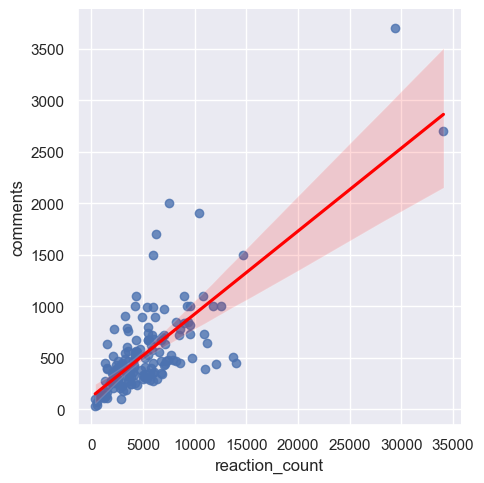

In [65]:
sns.lmplot(x='reaction_count', y='comments', data=df[['comments', 'reaction_count']].drop(index=[72]), order=1, line_kws={'color': 'red'})